In [14]:
import sys, collections
import numpy as np
from datetime import datetime
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

## Nonparametric Modeling of Water Levels

This is an interesting data set showing the levels of water on a riverbank. Some of the days are missing, so I create a nonparametric model to interpolate the missing water level. Some of the challenges involved here are to convert the dates into numbers, while accounting for weekends, i.e. if Friday is 1, next Monday should be 4, not 2. Also, finding an optimal number of knots on the spline took some experimentation. 

In [15]:
PATH = '/users/krishnarao/downloads/'

In [16]:
text_file = open(PATH +"input000.txt", "r")
lines = text_file.readlines()[1:]

index_nonmissing = []
readings_list = []
dates_list = []


count = -1
for line in lines:
    count+=1
    dates_list.append(datetime.strptime(line.split('\t')[0].split(' ')[0], '%m/%d/%Y'))
    try:
        readings_list.append(np.float(line.split('\t')[1]))    
        index_nonmissing.append(count)
    except: 
        readings_list.append('Missing')
        
text_file.close()

In [17]:
ints_dates_list = [(date -dates_list[0]).days for date in dates_list]

In [18]:
x = np.array([ints_dates_list[x] for x in index_nonmissing])
y = np.array([readings_list[x] for x in index_nonmissing])
xs = np.array(ints_dates_list)
s = UnivariateSpline(x, y, s=25)
ys = s(xs)

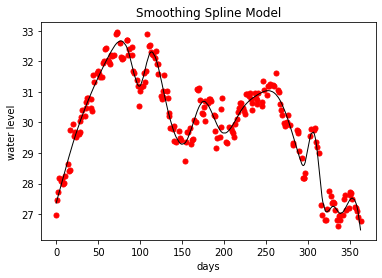

In [19]:
plt.plot(x, y, 'ro', ms=5)
plt.plot(xs, ys, 'black', lw=1)
plt.title('Smoothing Spline Model')
plt.xlabel('days')
plt.ylabel('water level')
plt.show()

This shows the level of water in the river over time. 

In [20]:
final_list = [] 
for i in range(len(ys)):
    if i in index_nonmissing: 
        final_list.append(readings_list[i])
    else: 
        final_list.append(ys[i])

In [21]:
final_list

[26.96,
 27.47,
 27.728,
 28.19,
 28.1,
 28.15,
 27.98,
 28.02,
 28.25,
 28.65,
 28.4,
 28.435,
 29.74,
 29.95,
 29.5703,
 29.65,
 29.7,
 29.53,
 29.62,
 29.7,
 30.05,
 30.17,
 30.4,
 30.22,
 30.485,
 30.67,
 30.8,
 30.8,
 30.77,
 30.46,
 30.39,
 31.55,
 31.32,
 31.61,
 31.68,
 31.59,
 31.5,
 31.5,
 31.93,
 32.0,
 32.39,
 32.44,
 32.05,
 31.98,
 31.92,
 32.21,
 32.16,
 32.2,
 32.51689706275104,
 32.88,
 32.94,
 32.95,
 32.61,
 32.15,
 32.66298593468892,
 32.09,
 32.11,
 32.52548344349979,
 32.7,
 32.7,
 32.19,
 32.41,
 32.46,
 32.19,
 31.69,
 31.63,
 31.4,
 31.19,
 30.53,
 31.04,
 31.16,
 31.19,
 31.61,
 31.31,
 31.68,
 32.89,
 32.5,
 32.52,
 32.32,
 32.23,
 32.22,
 32.11,
 32.335,
 31.925,
 31.9,
 31.57,
 30.86,
 30.78,
 30.83,
 31.02,
 31.54,
 31.04,
 30.795,
 30.32,
 30.2084,
 29.81,
 29.79,
 29.88,
 29.4,
 29.587039361603225,
 29.36,
 29.72,
 29.479,
 29.42,
 29.287745564518012,
 29.313941712493694,
 28.75,
 29.37,
 29.7,
 29.68,
 29.81,
 29.3,
 29.44,
 29.46,
 30.08,
 30.03,
 31.1

The above list includes the new, interpolated values. 